<a href="https://www.kaggle.com/code/snehad961/chocolate-sales-customer-segmentation?scriptVersionId=227254874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.xlsx
/kaggle/input/chocolate-sales/Chocolate Sales.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
df.shape

(1094, 6)

In [5]:
print(df.describe())

       Boxes Shipped
count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000


In [6]:
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [7]:
#Convert amount from object to Float

#Remove $ and commas
df.replace(',','', regex=True, inplace=True)
df.replace('\$','', regex=True, inplace=True)

df['Amount']=df.Amount.astype('double')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


### Data Cleaning

In [8]:
#Look for missing values:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

### EDA

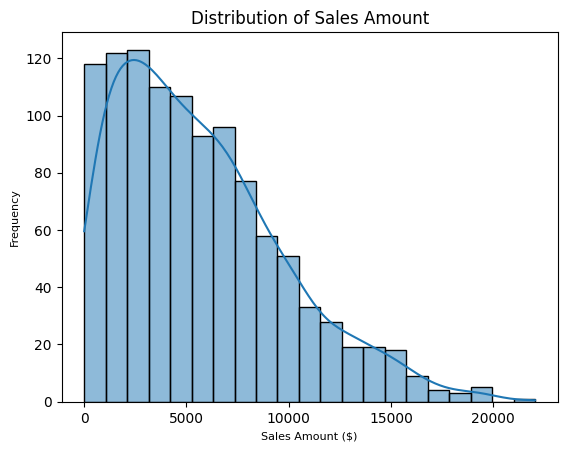

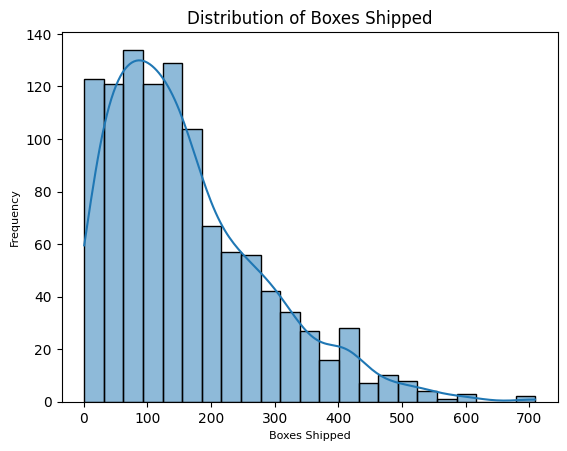

In [9]:
#Sales distribution

sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Sales Amount', fontsize=12)
plt.xlabel('Sales Amount ($)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.show()

#Boxes distribution

sns.histplot(df['Boxes Shipped'], kde=True)
plt.title('Distribution of Boxes Shipped', fontsize=12)
plt.xlabel('Boxes Shipped', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.show()

#Conclusion: Most sales is between 1000$ - 5000$
#Conclusion: Most boxes sold between 10-200

In [10]:
#groupby slaes person and country
df.groupby(['Sales Person','Country']).agg({'Amount':'sum','Boxes Shipped':'sum'}).reset_index().head(15)

,Sales Person,Country,Amount,Boxes Shipped
0,Andria Kimpton,Australia,30170.0,1317
1,Andria Kimpton,Canada,39298.0,1677
2,Andria Kimpton,India,27146.0,864
3,Andria Kimpton,New Zealand,32844.0,963
4,Andria Kimpton,UK,36659.0,1114
5,Andria Kimpton,USA,35630.0,513
6,Barr Faughny,Australia,46536.0,657
7,Barr Faughny,Canada,45927.0,1271
8,Barr Faughny,India,30842.0,956
9,Barr Faughny,New Zealand,61145.0,1668


In [11]:
#Group by country and product type and sum by sales amount and boxes shipped
df_cp = df.groupby(['Country','Product']).agg({'Amount':'sum', 'Boxes Shipped':'sum'})
df_cp

Amount  Boxes Shipped
Country   Product                                    
Australia 50% Dark Bites       89222.0           3182
          70% Dark Bites       39354.0           2103
          85% Dark Bars        38479.0           1200
          99% Dark & Pure      54908.0           1350
          After Nines          27769.0            912
...                                ...            ...
USA       Peanut Butter Cubes  33628.0           1209
          Raspberry Choco      83524.0           1497
          Smooth Sliky Salty   45493.0           1320
          Spicy Special Slims  25214.0           1385
          White Choc           67221.0           1204

[132 rows x 2 columns]

In [12]:
df.groupby(['Country','Product']).agg({'Amount':'mean', 'Boxes Shipped':'mean'})

Amount  Boxes Shipped
Country   Product                                        
Australia 50% Dark Bites       5576.375000     198.875000
          70% Dark Bites       4372.666667     233.666667
          85% Dark Bars        4809.875000     150.000000
          99% Dark & Pure      4991.636364     122.727273
          After Nines          3967.000000     130.285714
...                                    ...            ...
USA       Peanut Butter Cubes  4804.000000     172.714286
          Raspberry Choco      7593.090909     136.090909
          Smooth Sliky Salty   5686.625000     165.000000
          Spicy Special Slims  3151.750000     173.125000
          White Choc           6722.100000     120.400000

[132 rows x 2 columns]

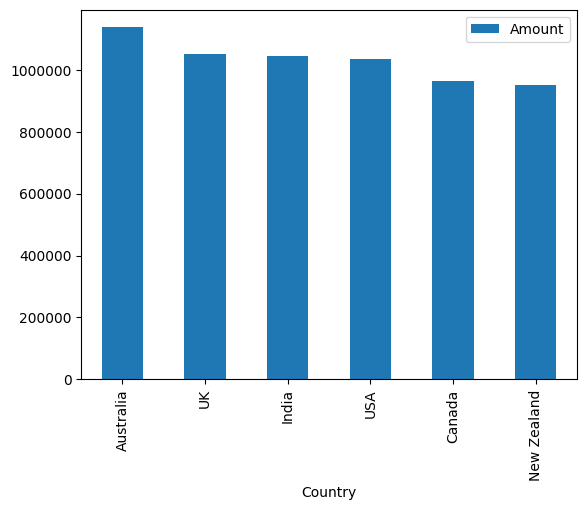

In [13]:
#Group by country and sum by sales amount
grp_country = df.groupby('Country').agg({'Amount':'sum'})
grp_country = grp_country.reset_index()
grp_country = grp_country.sort_values(by='Amount', ascending=False)

grp_country.plot.bar(x='Country', y='Amount')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

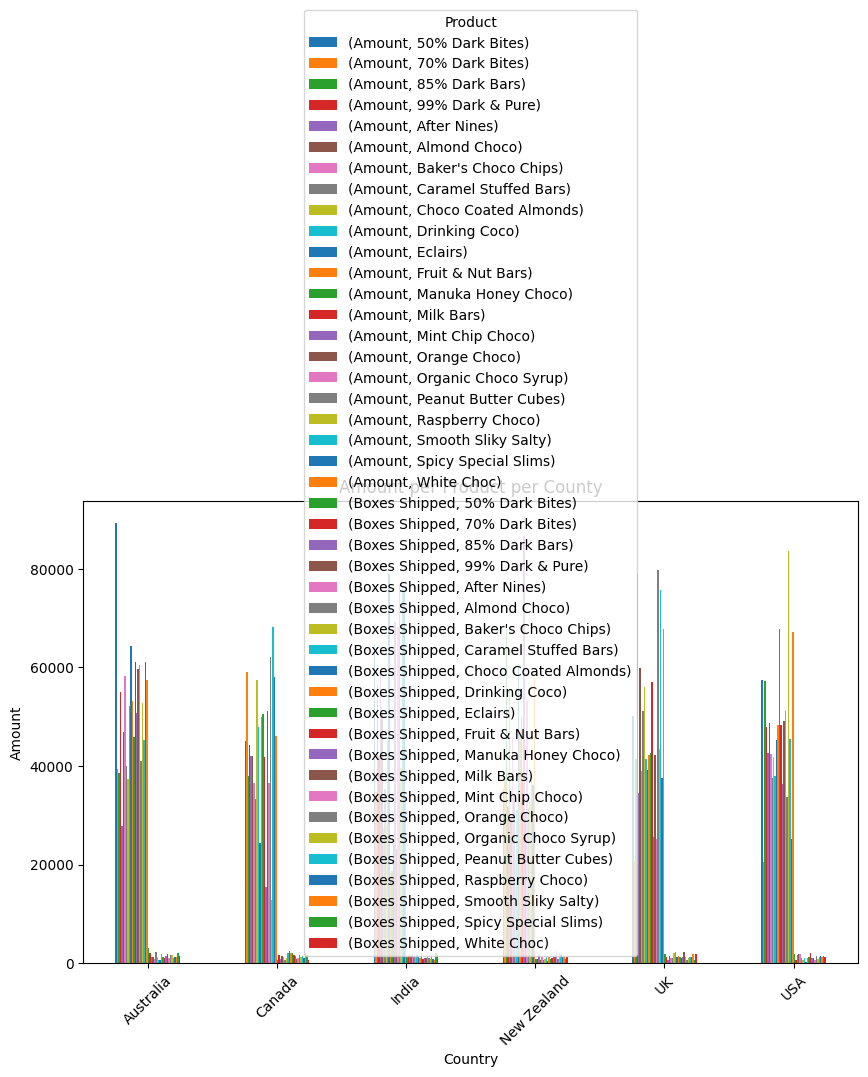

In [14]:
# Step 3: Unstack the DataFrame
unstacked_df = df_cp.unstack(level='Product')

# Step 4: Plot the data
unstacked_df.plot(kind='bar', figsize=(10, 6))
plt.title('Amount per Product per County')
plt.ylabel('Amount')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

In [15]:
#Which products are most popular
popular_prod = df.groupby('Product').agg({'Amount':'sum', 'Boxes Shipped':'sum'}).reset_index().sort_values(by='Boxes Shipped', ascending=False)
popular_prod

,Product,Amount,Boxes Shipped
0,50% Dark Bites,341712.0,9792
19,Smooth Sliky Salty,349692.0,8810
10,Eclairs,312445.0,8757
7,Caramel Stuffed Bars,231588.0,8717
20,Spicy Special Slims,293454.0,8685
9,Drinking Coco,256655.0,8660
13,Milk Bars,269248.0,8330
17,Peanut Butter Cubes,324842.0,8304
4,After Nines,261331.0,8257
21,White Choc,329147.0,8240


<Axes: xlabel='Product'>

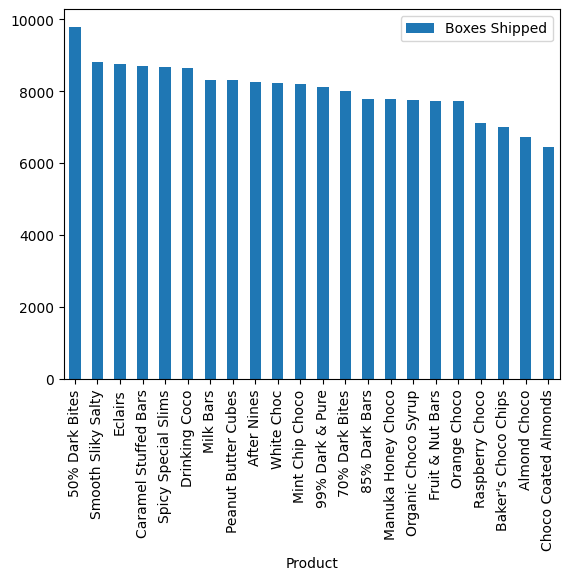

In [16]:
popular_prod.plot.bar(x='Product',y='Boxes Shipped')

In [17]:
#Type of chocolate (Dark, Milk, White).
#Consider categorising product

df.Product.unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

#### Categories:
- Choco
- Dark
- Milk
- Nuts [Fruit & Nut Bars, Peanut Butter Cubes]
- Other

In [18]:
def category(row):
    product = row.Product  # Access the Product value directly 
    if 'Choco' in product or 'Coco' in product:
        return 'Choco'
    elif 'Milk' in product or 'White' in product:
        return 'Milk'
    elif 'Dark' in product:
        return 'Dark'
    elif 'Nut' in product or 'nut' in product:
        return 'Nuts'
    elif 'Eclairs' in product:
        return 'Eclairs'
    else:
        return 'Other'

# Apply the category function to each row
df['product_category'] = df.apply(category, axis=1)

In [19]:
df.groupby('product_category').agg({'Product':'nunique'})

,Product
product_category,
Choco,9
Dark,4
Eclairs,1
Milk,2
Nuts,2
Other,4


In [20]:
other = df[df.product_category=='Other']
other.groupby('Product').agg({'Boxes Shipped':'sum'})

,Boxes Shipped
Product,
After Nines,8257
Caramel Stuffed Bars,8717
Smooth Sliky Salty,8810
Spicy Special Slims,8685


In [21]:
prod_category = df.groupby('product_category').agg({'Amount':'sum','Boxes Shipped':'sum'}).reset_index().sort_values(by='Boxes Shipped', ascending=False)
prod_category

,product_category,Amount,Boxes Shipped
0,Choco,2400384.0,67442
5,Other,1136065.0,34469
1,Dark,1152347.0,33727
3,Milk,598395.0,16570
4,Nuts,583989.0,16042
2,Eclairs,312445.0,8757


<Axes: xlabel='product_category'>

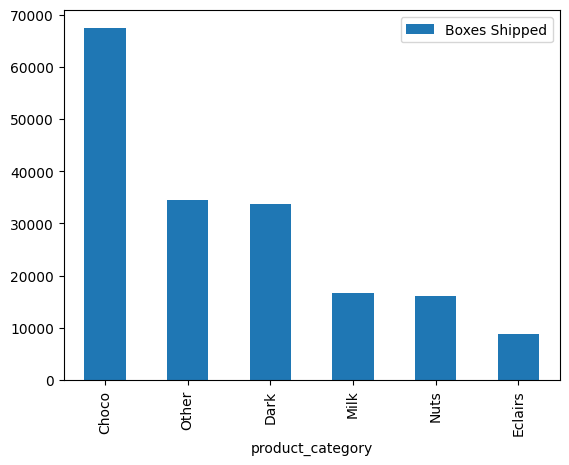

In [22]:
prod_category.plot.bar(x='product_category', y='Boxes Shipped')

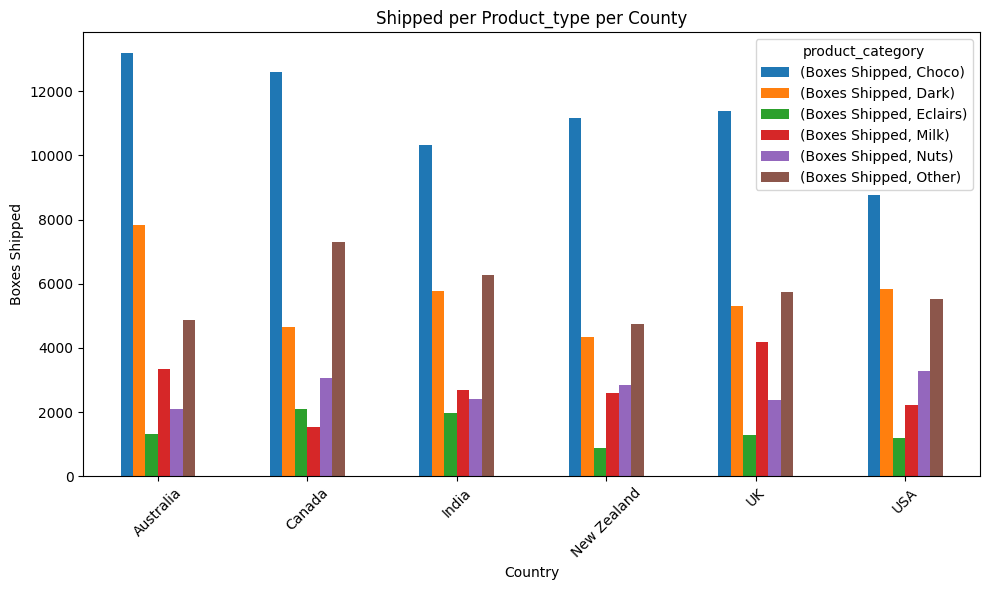

In [23]:
#County by type of chocolate
country_cat = df.groupby(['Country','product_category']).agg({'Boxes Shipped':'sum'})

unstack_df_1 = country_cat.unstack(level='product_category')
unstack_df_1

# Step 4: Plot the data
unstack_df_1.plot(kind='bar', figsize=(10, 6))
plt.title('Shipped per Product_type per County')
plt.ylabel('Boxes Shipped')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='product_category')
plt.tight_layout()
plt.show()

### Analyse sales corresponding to time frame

In [24]:
df['Date']  = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [25]:
df["Month"]= df.Date.dt.month
df["Week"] = df.Date.dt.isocalendar().week
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,product_category,Month,Week
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,Choco,1,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,Dark,8,31
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nuts,7,27
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nuts,4,17
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nuts,2,8


<Axes: xlabel='Month'>

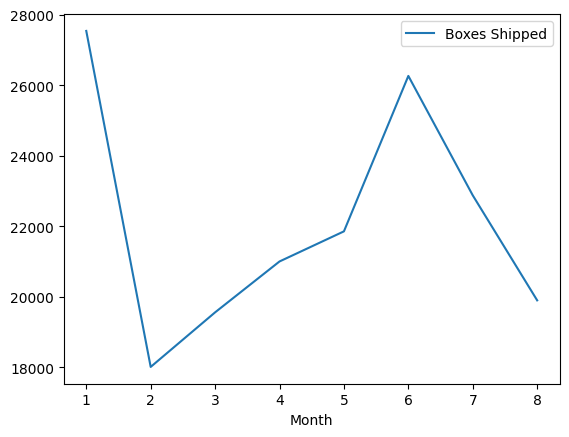

In [26]:
month_grouped = df.groupby('Month').agg({'Amount':'sum','Boxes Shipped':sum}).sort_values(by='Month').reset_index()
month_grouped
month_grouped.plot.line(x="Month",y="Boxes Shipped")

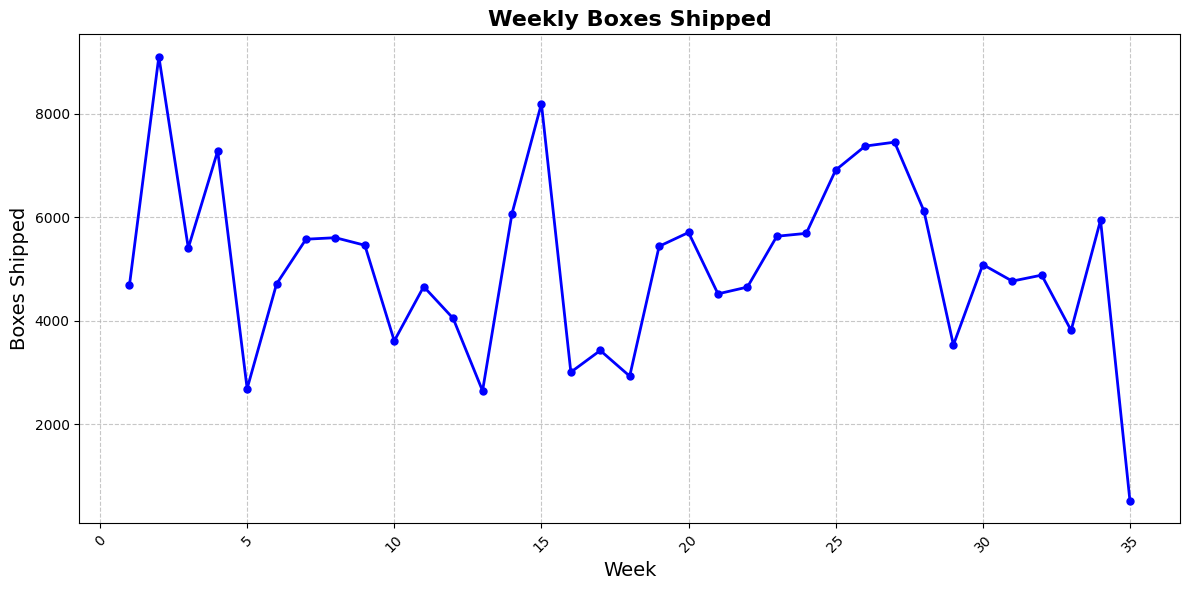

In [27]:
import matplotlib.pyplot as plt

# Grouping and aggregating the data
week_grouped = df.groupby('Week').agg({'Amount': 'sum', 'Boxes Shipped': sum}).sort_values(by='Week').reset_index()

# Creating the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(week_grouped['Week'], week_grouped['Boxes Shipped'], marker='o', linestyle='-', color='b', linewidth=2, markersize=5)

# Adding titles and labels
plt.title('Weekly Boxes Shipped', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Boxes Shipped', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optionally, customize the ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Text(0, 0.5, 'Boxes Shipped')

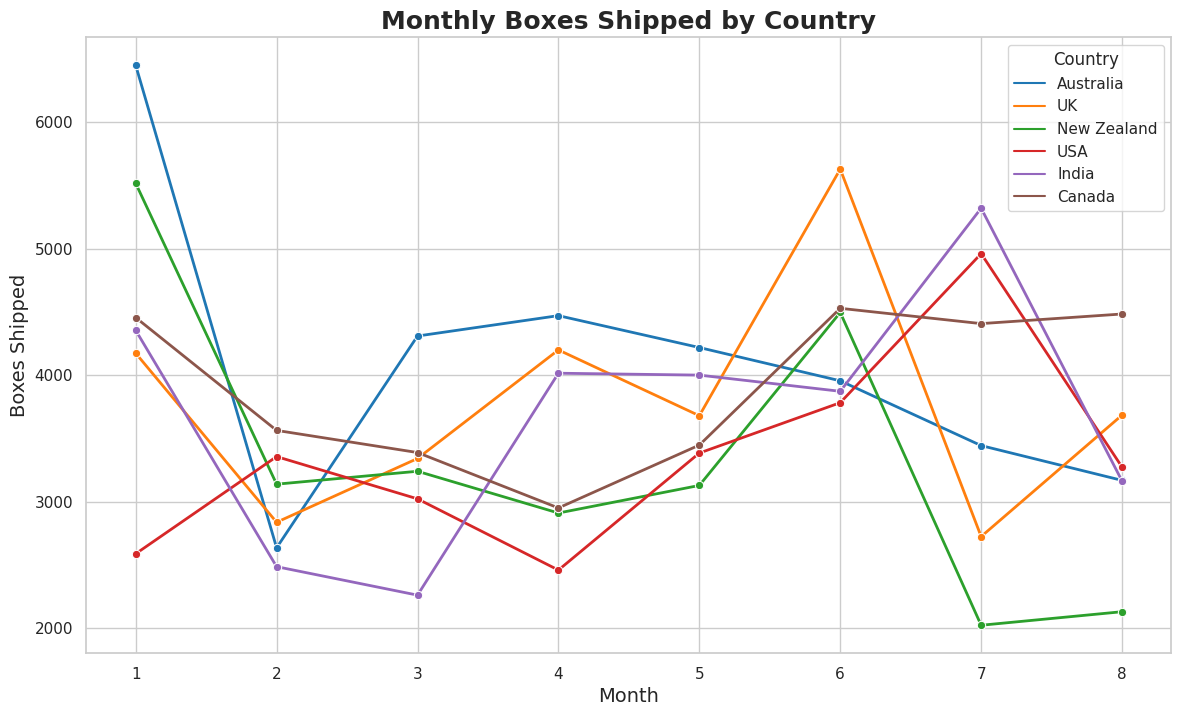

In [28]:

# Grouping and aggregating the data
Month_grouped = df.groupby(['Country','Month']).agg({'Amount': 'sum', 'Boxes Shipped': sum}).sort_values(by='Month').reset_index()
Month_grouped.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))  # Set the figure size
sns.lineplot(data=Month_grouped, x='Month', y='Boxes Shipped', hue='Country', marker='o', palette='tab10', linewidth=2)

# Adding titles and labels
plt.title('Monthly Boxes Shipped by Country', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Boxes Shipped', fontsize=14)

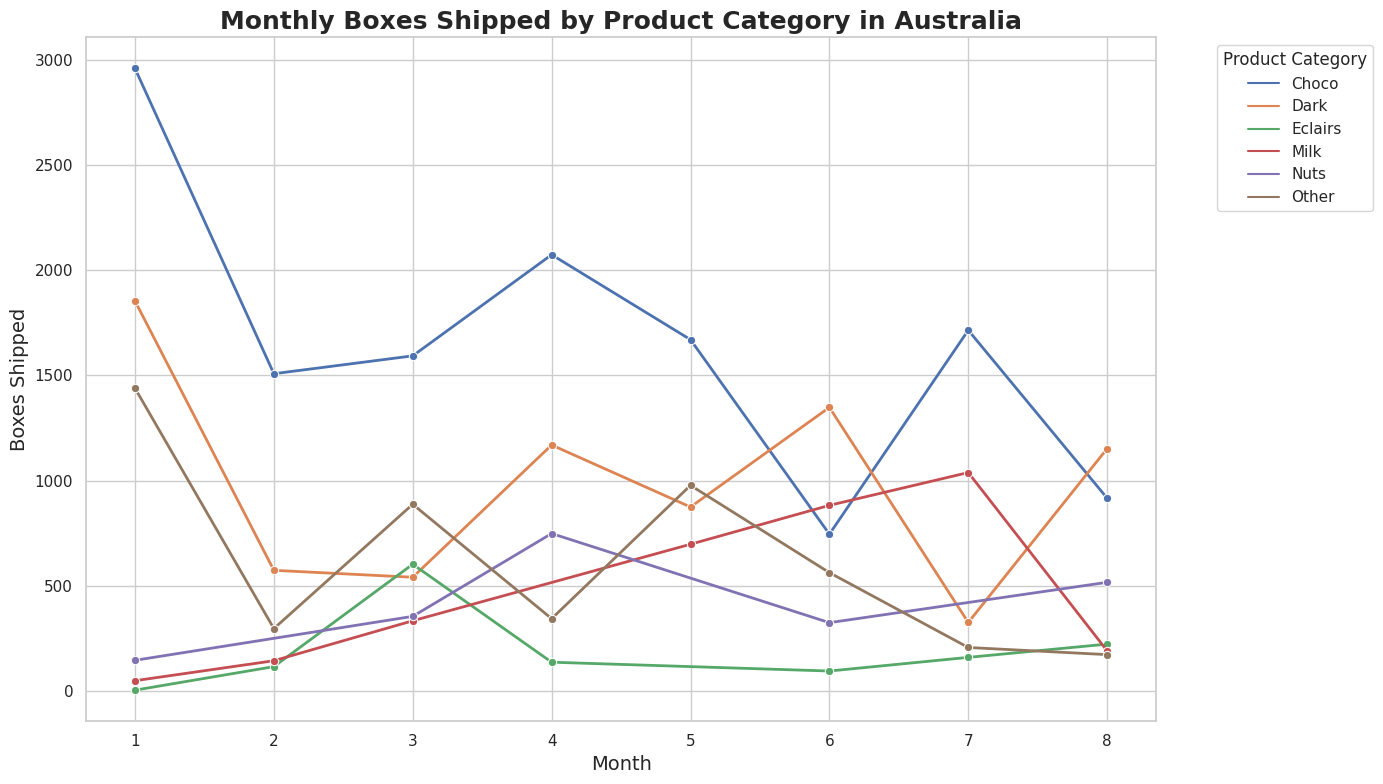

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and aggregating the data
product_data = df.groupby(['product_category', 'Month', 'Country']).agg({'Amount': 'sum', 'Boxes Shipped': 'sum'}).reset_index()

# Filter the data for Australia
australia_data = product_data[product_data['Country'] == 'Australia']
australia_data.head()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot for boxes shipped by product category in Australia
plt.figure(figsize=(14, 8))  # Set the figure size

# Generate the line plot
sns.lineplot(data=australia_data, x='Month', y='Boxes Shipped', hue='product_category', marker='o', linewidth=2)

# Adding titles and labels
plt.title('Monthly Boxes Shipped by Product Category in Australia', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Boxes Shipped', fontsize=14)

# Show the plot
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()

### Conclusions:

#### Country-Product EDA
- All countries buy chocolate in close range. With Australia as the leader
- Choco has the most variety - 9 categories
- Choco followed by Darck choclate is sold highly across countries
- Top 5 chocolates sold:
    - 50% Dark Bites	    341712.0	9792
    - Smooth Sliky Salty	349692.0	8810
    - Eclairs	            312445.0	8757
    - Caramel Stuffed Bars	231588.0	8717
    - Spicy Special Slims	293454.0	8685

#### Time analysis
- Spike in sales during January (Holiday season)
- Spike in sales in week 15 April (Easter; Seasonal promotions)
- Spike in sales around week 25-30 (July 4th in USA)


### Modeling

#### Identify purchasing patterns across different customer segments.

In [30]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,product_category,Month,Week
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,Choco,1,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,Dark,8,31
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nuts,7,27
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nuts,4,17
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nuts,2,8


In [31]:
#Preparing data for clustering
customer_data = df.groupby(['Country','Product','Month' ]).agg({'Amount':'sum','Boxes Shipped':'sum'}).reset_index()

In [32]:
#Normalization - Scale consistency, better cenvergence, Distance metrics, Interpretability
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Amount', 'Boxes Shipped']])

In [33]:
#Clustering:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

In [34]:
customer_data

,Country,Product,Month,Amount,Boxes Shipped,Cluster
0,Australia,50% Dark Bites,1,11872.0,1126,2
1,Australia,50% Dark Bites,3,15281.0,156,1
2,Australia,50% Dark Bites,4,7287.0,12,1
3,Australia,50% Dark Bites,5,4529.0,860,2
4,Australia,50% Dark Bites,6,8344.0,641,2
...,...,...,...,...,...,...
675,USA,White Choc,3,14714.0,156,1
676,USA,White Choc,5,19670.0,376,0
677,USA,White Choc,6,6559.0,119,1
678,USA,White Choc,7,2030.0,60,1


In [35]:
#Analyze clusters
cluster_summary = customer_data.groupby('Cluster').agg(
    Total_Sales=('Amount', 'mean'),      # Mean of Total Sales
    Boxes_Shipped=('Boxes Shipped', 'mean'),  # Mean of Boxes shipped
    Number_of_Records=('Amount', 'size')  # Count of records in each cluster
).reset_index()

# Display the summary
print(cluster_summary)

   Cluster   Total_Sales  Boxes_Shipped  Number_of_Records
0        0  22526.875000     436.750000                 96
1        1   6472.393103     145.397701                435
2        2   8090.966443     482.087248                149


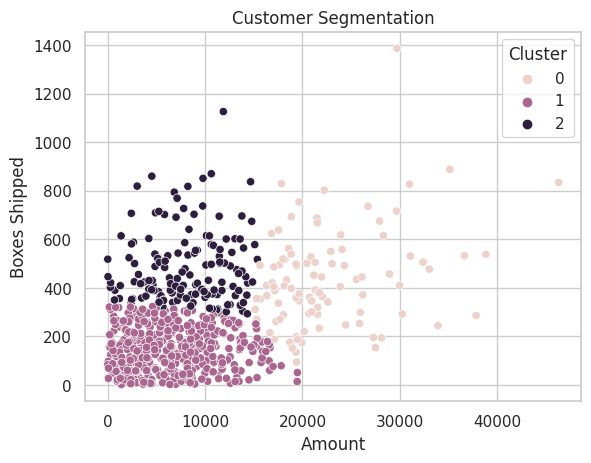

In [36]:
sns.scatterplot(x='Amount', y='Boxes Shipped', hue='Cluster', data=customer_data)
plt.title('Customer Segmentation')
plt.show()

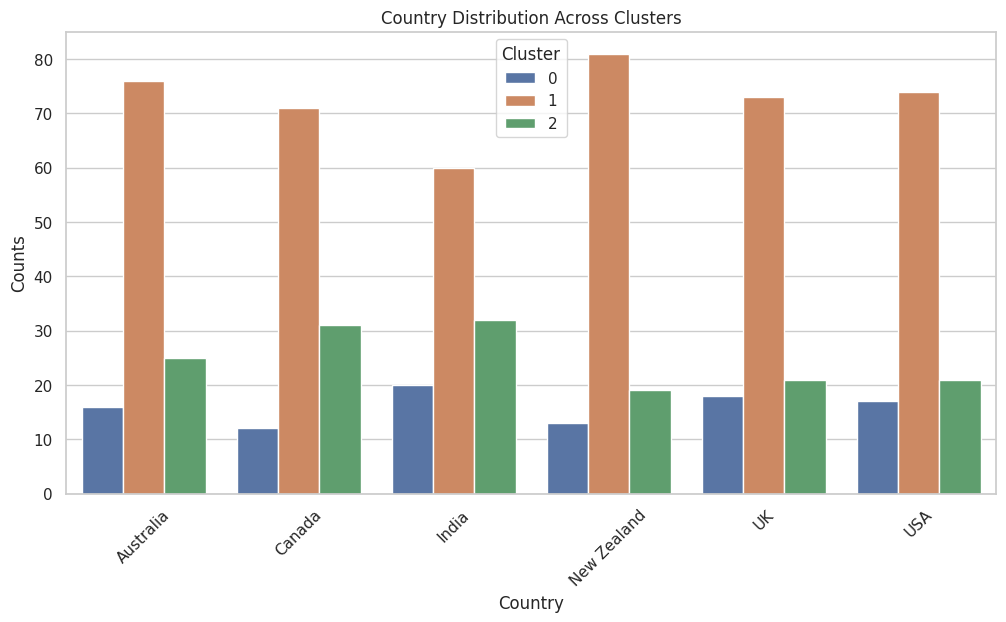

In [37]:
# Create a DataFrame for visualization
country_counts = customer_data.groupby(['Cluster', 'Country']).size().reset_index(name='Counts')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Counts', hue='Cluster', data=country_counts)
plt.title('Country Distribution Across Clusters')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Count occurrences of each country in each cluster
country_counts = customer_data.groupby(['Cluster', 'Country']).size().reset_index(name='Country_Count')
print("Country Occurrences in Each Cluster:")
print(country_counts)

Country Occurrences in Each Cluster:
    Cluster      Country  Country_Count
0         0    Australia             16
1         0       Canada             12
2         0        India             20
3         0  New Zealand             13
4         0           UK             18
5         0          USA             17
6         1    Australia             76
7         1       Canada             71
8         1        India             60
9         1  New Zealand             81
10        1           UK             73
11        1          USA             74
12        2    Australia             25
13        2       Canada             31
14        2        India             32
15        2  New Zealand             19
16        2           UK             21
17        2          USA             21


In [39]:
# Calculate total boxes shipped per product in each cluster
product_popularity = customer_data.groupby(['Cluster', 'Product'])['Amount'].sum().reset_index()

# Get top 5 products for each cluster based on 'Amount'
top_products = product_popularity.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Amount')).reset_index(drop=True)

# Calculate total boxes shipped for each cluster
total_sales_per_cluster = product_popularity.groupby('Cluster')['Amount'].sum().reset_index()
total_sales_per_cluster.rename(columns={'Amount': 'Total Sales'}, inplace=True)

# Merge to get total sales in each cluster
top_products = top_products.merge(total_sales_per_cluster, on='Cluster')

# Calculate percentage contribution of top 5 products to total sales in the cluster
top_products['Percentage Contribution'] = (top_products['Amount'] / top_products['Total Sales']) * 100

# Order results by Cluster
top_products_sorted = top_products.sort_values(by='Cluster').reset_index(drop=True)

print("\nTop 5 Products in Each Cluster with Percentage Contribution:")
print(top_products_sorted[['Cluster', 'Product', 'Amount','Percentage Contribution']])


Top 5 Products in Each Cluster with Percentage Contribution:
    Cluster               Product    Amount  Percentage Contribution
0         0   Peanut Butter Cubes  168931.0                 7.811549
1         0         85% Dark Bars  157381.0                 7.277465
2         0    Smooth Sliky Salty  154329.0                 7.136337
3         0    Manuka Honey Choco  150332.0                 6.951512
4         0   Organic Choco Syrup  145152.0                 6.711983
5         1               Eclairs  193228.0                 6.863030
6         1            White Choc  185675.0                 6.594764
7         1          Almond Choco  184415.0                 6.550012
8         1        50% Dark Bites  164997.0                 5.860328
9         1    Smooth Sliky Salty  160468.0                 5.699468
10        2        50% Dark Bites   99939.0                 8.289882
11        2  Caramel Stuffed Bars   95858.0                 7.951365
12        2             Milk Bars   80913

In [40]:
# Calculate total boxes shipped per month in each cluster
monthly_sales = customer_data.groupby(['Cluster', 'Month'])['Amount'].sum().reset_index()

# Get the month with the highest sales for each cluster
highest_sales_months = monthly_sales.loc[monthly_sales.groupby('Cluster')['Amount'].idxmax()]

# Calculate total sales for each cluster
total_sales_per_cluster = monthly_sales.groupby('Cluster')['Amount'].sum().reset_index()
total_sales_per_cluster.rename(columns={'Amount': 'Total Sales'}, inplace=True)

# Merge to get total sales in each cluster
highest_sales_months = highest_sales_months.merge(total_sales_per_cluster, on='Cluster')

# Calculate percentage contribution of the highest sales month to total sales in the cluster
highest_sales_months['Percentage Contribution'] = (highest_sales_months['Amount'] / highest_sales_months['Total Sales']) * 100

# Print the months with highest sales and their percentage contribution
print("\nMonths with Highest Sales in Each Cluster and Their Percentage Contribution:")
print(highest_sales_months[['Cluster', 'Month', 'Amount', 'Percentage Contribution']])


Months with Highest Sales in Each Cluster and Their Percentage Contribution:
   Cluster  Month    Amount  Percentage Contribution
0        0      6  412979.0                19.096588
1        1      3  512190.0                18.191854
2        2      1  196707.0                16.316731


#### Conclusion

   Cluster   Total_Sales  Boxes_Shipped  Number_of_Records
-     0   6472.393103     145.397701                435
-     1  22526.875000     436.750000                 96
-     2   8090.966443     482.087248                149

**From the cluster summary we can infer that:**
- Most transactions fall under clsuter 0 with smaller mean Amount & boxes shipped -> 64%. Indicating a large number of transactions but relatively low sales volume per transaction.
- Followed by 21% falling in cluster 2. Which has high number of boxes shipped per transcation but the mean price is low
- Remaining 15% falls under high Amount cluster. Indicating higher-value purchases or fewer customers.


**Top 5 Products in Each Cluster**
- Cluster 0: The top products include Eclairs, White Chocolate, and Almond Chocolate, indicating a preference for classic and popular chocolate types among customers in this cluster.
- Cluster 1:The top products are more diverse, including Peanut Butter Cubes and 85% Dark Bars, suggesting that this cluster might cater to health-conscious consumers or those looking for premium chocolate options.
- Cluster 2:The presence of products like 50% Dark Bites and Caramel Stuffed Bars indicates a balance between indulgence and moderate health considerations, appealing to a broader audience.

**Months with Highest Sales in Each Cluster**
- Cluster 0: Highest sales in March with a contribution of 18.19%.
- Cluster 1: Highest sales in June with a contribution of 19.10%.
- Cluster 2: Highest sales in January with a contribution of 16.32%.

**Summary**
- Cluster 1 clearly outperforms the others in total sales, indicating a potentially lucrative market segment. The products and trends observed here could inform marketing strategies and product offerings.
- Cluster 1 might benefit from premium product promotions, while Cluster 0 might focus on volume sales of popular products.
- The month with the highest sales varies by cluster, indicating potential seasonality in chocolate sales.